In [51]:
!pip install jovian opendatasets --upgrade 
!pip install plotly


In [52]:
<center><img alt="Insight logo" src="https://cloudfront-us-east-1.images.arcpublishing.com/tgam/4MUHNVKYZFPT7IFP3NMEPRZ554.jpg" align="center" hspace="10px" vspace="10px" width="500" height="1100" ></center>


SyntaxError: invalid syntax (1645624827.py, line 1)

In [ ]:
# Downloading the libraries
import os
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True) 


In [ ]:
# Downloading the url
dataset_url= 'https://www.kaggle.com/datasets/thedevastator/gender-mental-disorder-prevalence-2019'

dataset_url2 = 'https://www.kaggle.com/datasets/thedevastator/uncover-global-trends-in-mental-health-disorder'

In [ ]:
od.download(dataset_url)
od.download(dataset_url2)

In [ ]:
data_dir ='./gender-mental-disorder-prevalence-2019'
data_dir2 = './uncover-global-trends-in-mental-health-disorder'

In [ ]:
os.listdir(data_dir)
os.listdir(data_dir2)

In [ ]:
project_name = "uncover-global-trends-in-mental-health-disorder-data-analysis" 

In [ ]:
!pip install jovian --upgrade -q

In [ ]:
import jovian

In [ ]:
jovian.commit(project=project_name)

In [ ]:
mental_health_raw_df = pd.read_csv (data_dir2 + '/Mental health Depression disorder Data.csv')

In [ ]:
schizophrenia_raw_df = pd.read_csv(data_dir + '/prevalence-of-schizophrenia-in-males-vs-females(1).csv')
bipolar_disorder_raw_df = pd.read_csv(data_dir + '/prevalence-of-bipolar-disorder-in-males-vs-females.csv')
eating_disorder_raw_df = pd.read_csv(data_dir + '/prevalence-of-eating-disorders-in-males-vs-females.csv')
anxiety_disorder_raw_df = pd.read_csv(data_dir + '/prevalence-of-anxiety-disorders-males-vs-females.csv')
depression_raw_df = pd.read_csv(data_dir + '/prevalence-of-depression-males-vs-females.csv')

# Asking and Answering Questions

We have now analyzed and visualized key aspects of our data such as gender and region explorations for each mental health disorder in our data frame such as anxiety, depression, bipolar disorder, anxiety disorder, and schizophrenia. All of these questions will be related specifically to Canada. 

In [53]:
<center><img alt="Insight logo" src="https://cloudfront-us-east-1.images.arcpublishing.com/tgam/4MUHNVKYZFPT7IFP3NMEPRZ554.jpg" align="center" hspace="10px" vspace="10px" width="500" height="1100" ></center>


SyntaxError: invalid syntax (1645624827.py, line 1)

In [54]:
### Questions I am to answer:

- Which mental health disorders exhibit a higher prevalence rate among males compared to females? Among females, which mental health disorders have a higher prevalence rate compared to males?
- Are there any correlations or co-occurrence patterns between different mental health disorders based on the available data?
- Which mental health disorders have shown an increase, decrease, or remained stable in prevalence over time?


Object `males` not found.
Object `data` not found.


# Exploring data for mental health disorders in Canada

### What are the top 10 countries with anxiety use disorder ?

In [55]:
mean = mental_health_raw_df.groupby('Entity')[['Schizophrenia (%)', 'Bipolar disorder (%)','Eating disorders (%)', 
                                          'Anxiety disorders (%)', 'Drug use disorders (%)', 'Depression (%)',
                                          'Alcohol use disorders (%)']].mean().reset_index()

mean.head()

,Entity,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,4.848102,2.120798,4.118622,0.663151
1,Africa,NaN,NaN,NaN,NaN
2,Albania,3.368903,0.498765,2.190442,1.746757
3,Algeria,5.011396,1.540640,3.657743,0.653712
4,American Samoa,3.293312,0.759355,2.940850,1.135266


Text(0, 0.5, 'Average Percentage %')

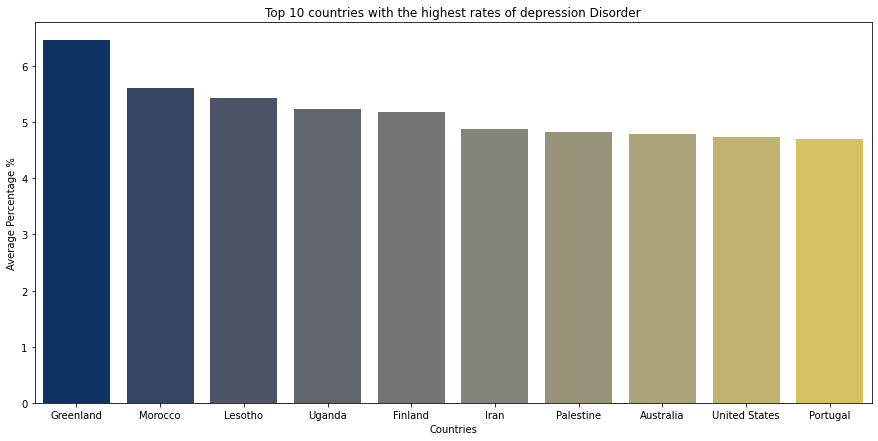

In [57]:
plt.figure(figsize = (15,7))
sns.barplot(data = mean, 
            x = 'Entity', 
            y = 'Depression (%)', 
            order = mean.sort_values('Depression (%)', ascending = False).Entity.head(10),
            palette = 'cividis')

#Set title, legend and x y axis
plt.title('Top 10 countries with the highest rates of depression Disorder',
          fontweight='light')

plt.xlabel('Countries')
plt.ylabel('Average Percentage %')


The country with the highest depression percentage is Greenland.

### Which mental health disorders exhibit a higher prevalence rate among males compared to females? Among females, which mental health disorders have a higher prevalence rate compared to males?


In [20]:
# filter the dataset for Canada 
canada_df = result_raw_df.loc[result_raw_df['Entity'] == 'Canada']
canada_df

NameError: name 'result_raw_df' is not defined

In [21]:
fig = px.bar(canada_df, x = 'Year', y=['Prevalence - Schizophrenia - Sex: Female - Age: Age-standardized (Percent)', 
                                       'Prevalence - Bipolar disorder - Sex: Female - Age: Age-standardized (Percent)',
                                       'Prevalence - Eating disorders - Sex: Female - Age: Age-standardized (Percent)',
                                       'Prevalence - Anxiety disorders - Sex: Female - Age: Age-standardized (Percent)',
                                       'Prevalence - Depressive disorders - Sex: Female - Age: Age-standardized (Percent)'],
             barmode='group', title='Prevalence Rates of Mental Health Disorders for Females')

fig.update_layout(
    xaxis_title='Index',
    yaxis_title='Prevalence Rate',
    title='Prevalence Rates of Mental Health Disorders For Female',
    legend_title='Mental Health Disorders',
    height = 600,
    width=1200
)

fig.update_xaxes(type='category')  
fig.update_traces(width=0.8)  # Adjust the width of the bars
fig.update_layout(bargap=0.05)  # Adjust the spacing between the bars
fig.update_layout(uniformtext_minsize=8)  # Adjust the minimum text size for uniform text

fig.show()


NameError: name 'canada_df' is not defined

In [22]:
fig = px.bar(canada_df, x='Year', y=['Prevalence - Schizophrenia - Sex: Male - Age: Age-standardized (Percent)', 
                                      'Prevalence - Bipolar disorder - Sex: Male - Age: Age-standardized (Percent)', 
                                      'Prevalence - Eating disorders - Sex: Male - Age: Age-standardized (Percent)',
                                      'Prevalence - Anxiety disorders - Sex: Male - Age: Age-standardized (Percent)',
                                      'Prevalence - Depressive disorders - Sex: Male - Age: Age-standardized (Percent)'], 
             barmode='group', title='Prevalence Rates of Mental Health Disorders for Males')

fig.update_layout(
    xaxis_title='Index',
    yaxis_title='Prevalence Rate',
    title='Prevalence Rates of Mental Health Disorders for Males',
    legend_title='Mental Health Disorders',
    height = 600,
    width=1200
)

fig.update_xaxes(type='category')  
fig.update_traces(width=0.8)  # Adjust the width of the bars
fig.update_layout(bargap=0.05)  # Adjust the spacing between the bars
fig.update_layout(uniformtext_minsize=8)  # Adjust the minimum text size for uniform text

fig.show()


NameError: name 'canada_df' is not defined

## Insights 

The graph shows that the mental health disorders that Males have a higher chance of having is Anxiety, then Depression, and then Bipolar Disorder.


### Are there any correlations or co-occurrence patterns between different mental health disorders based on the available data?


### Mental Health Disorders  

The choice of graph to display any coorrelations or patterns between different mental health disorders is a heatmap.

In [23]:
mental_health_raw_df

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260
...,...,...,...,...,...,...,...,...,...,...,...
108548,108548,Zimbabwe,ZWE,2013,303564.60359,NaN,NaN,NaN,NaN,NaN,NaN
108549,108549,Zimbabwe,ZWE,2014,311665.769283,NaN,NaN,NaN,NaN,NaN,NaN
108550,108550,Zimbabwe,ZWE,2015,320638.507158,NaN,NaN,NaN,NaN,NaN,NaN
108551,108551,Zimbabwe,ZWE,2016,330437.353798,NaN,NaN,NaN,NaN,NaN,NaN


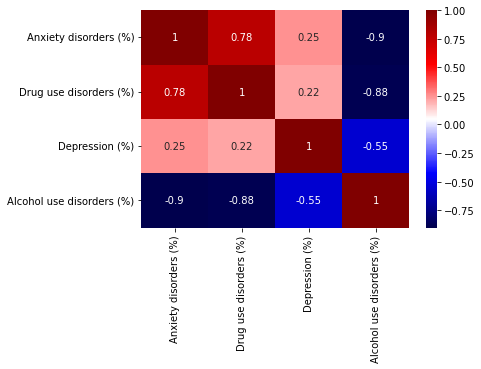

In [24]:
discordd = mental_health_raw_df[mental_health_raw_df.columns[2:11]].corr()

discordd = sns.heatmap(discordd.corr(), cmap="seismic", annot=True)

As we can see from this graph, the strongest correlation between these mental health disorder is Drug Use Disorder and Anxiety disorder

In [25]:
import jovian

In [26]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis


'https://jovian.com/manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis'

In [27]:
canada_df_2 = mental_health_raw_df[mental_health_raw_df['Entity'] == 'Canada']

In [28]:
canada_df_2

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
952,952,Canada,CAN,1990,0.313895,0.716075,0.442652,5.538491,1.802016,4.089515,1.529050
953,953,Canada,CAN,1991,0.314018,0.716383,0.442308,5.540824,1.811852,4.097314,1.518660
954,954,Canada,CAN,1992,0.314138,0.716693,0.441688,5.543399,1.830119,4.105661,1.510788
955,955,Canada,CAN,1993,0.314248,0.716988,0.442179,5.546001,1.854861,4.111715,1.505524
956,956,Canada,CAN,1994,0.314328,0.717223,0.442959,5.548263,1.882812,4.117476,1.502866
...,...,...,...,...,...,...,...,...,...,...,...
103060,103060,Canada,CAN,2013,1381335.47363,NaN,NaN,NaN,NaN,NaN,NaN
103061,103061,Canada,CAN,2014,1394733.32777,NaN,NaN,NaN,NaN,NaN,NaN
103062,103062,Canada,CAN,2015,1408679.85164,NaN,NaN,NaN,NaN,NaN,NaN
103063,103063,Canada,CAN,2016,1423298.88941,NaN,NaN,NaN,NaN,NaN,NaN


The choice of graph I have used is a line graph, I wanted to display all the mental health disorders seperately, so I have utilized the subplots() matplotlib function to display all the percentages of mental health disorders over a period of time.

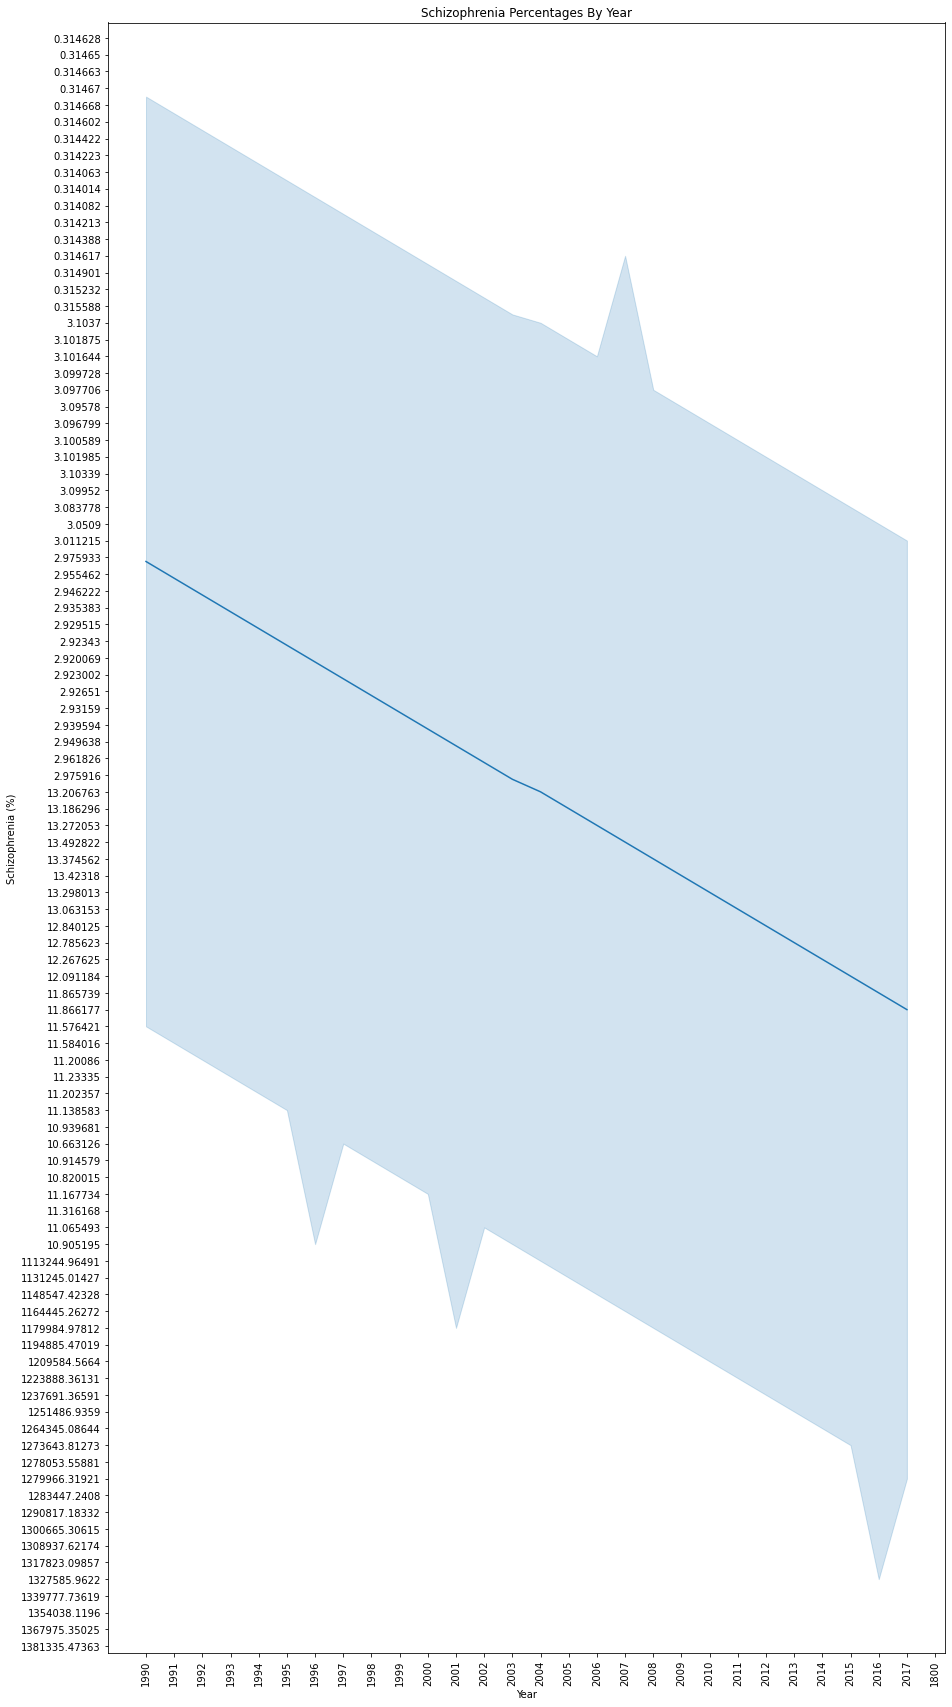

In [29]:
plt.figure(figsize=(15, 30))  # Set the figure size

sns.lineplot(data=canada_df_2, x="Year", y="Schizophrenia (%)")
plt.title('Schizophrenia Percentages By Year')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

plt.show()

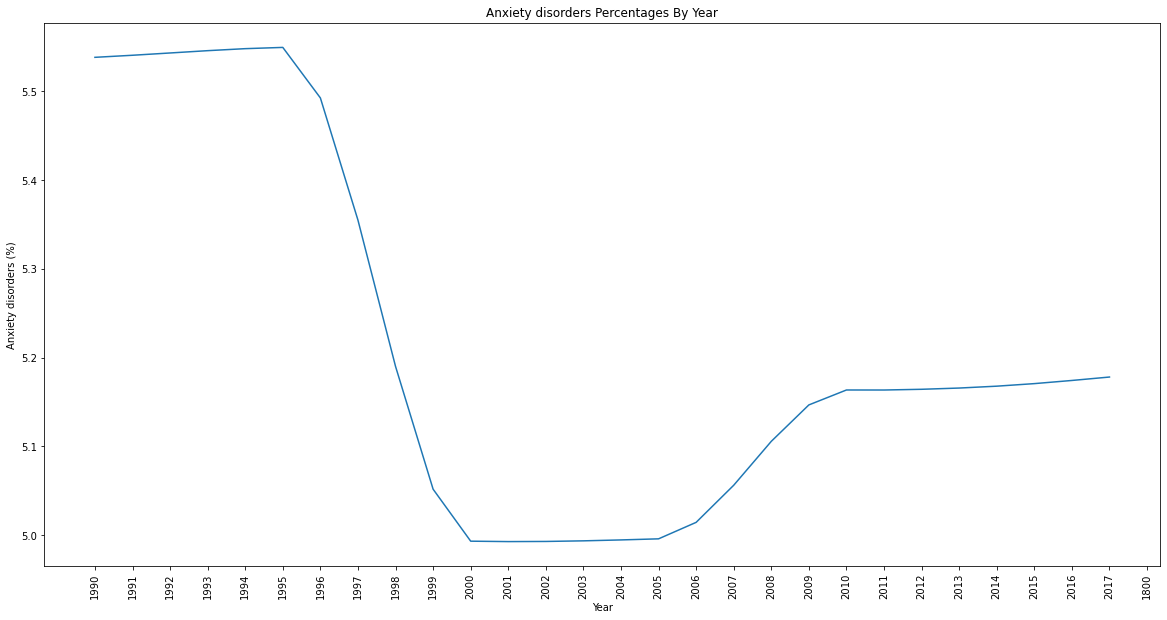

In [30]:
plt.figure(figsize=(20, 10))  # Set the figure size

sns.lineplot(data=canada_df_2, x="Year", y="Anxiety disorders (%)")
plt.title('Anxiety disorders Percentages By Year')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

plt.show()

In [31]:
canada_df_2

,index,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
952,952,Canada,CAN,1990,0.313895,0.716075,0.442652,5.538491,1.802016,4.089515,1.529050
953,953,Canada,CAN,1991,0.314018,0.716383,0.442308,5.540824,1.811852,4.097314,1.518660
954,954,Canada,CAN,1992,0.314138,0.716693,0.441688,5.543399,1.830119,4.105661,1.510788
955,955,Canada,CAN,1993,0.314248,0.716988,0.442179,5.546001,1.854861,4.111715,1.505524
956,956,Canada,CAN,1994,0.314328,0.717223,0.442959,5.548263,1.882812,4.117476,1.502866
...,...,...,...,...,...,...,...,...,...,...,...
103060,103060,Canada,CAN,2013,1381335.47363,NaN,NaN,NaN,NaN,NaN,NaN
103061,103061,Canada,CAN,2014,1394733.32777,NaN,NaN,NaN,NaN,NaN,NaN
103062,103062,Canada,CAN,2015,1408679.85164,NaN,NaN,NaN,NaN,NaN,NaN
103063,103063,Canada,CAN,2016,1423298.88941,NaN,NaN,NaN,NaN,NaN,NaN


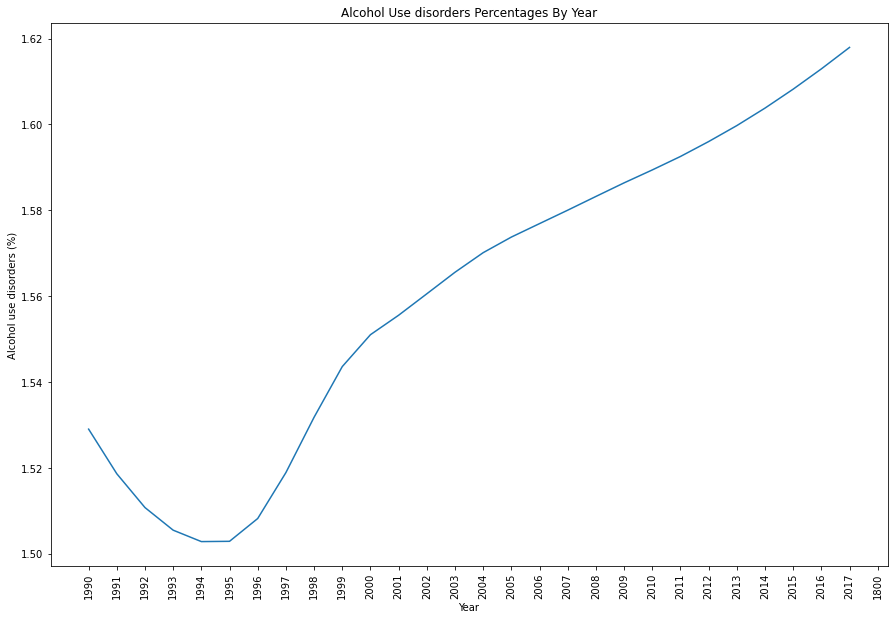

In [32]:
plt.figure(figsize=(15, 10))  # Set the figure size

sns.lineplot(data=canada_df_2, x="Year", y="Alcohol use disorders (%)")
plt.title('Alcohol Use disorders Percentages By Year')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

plt.show()

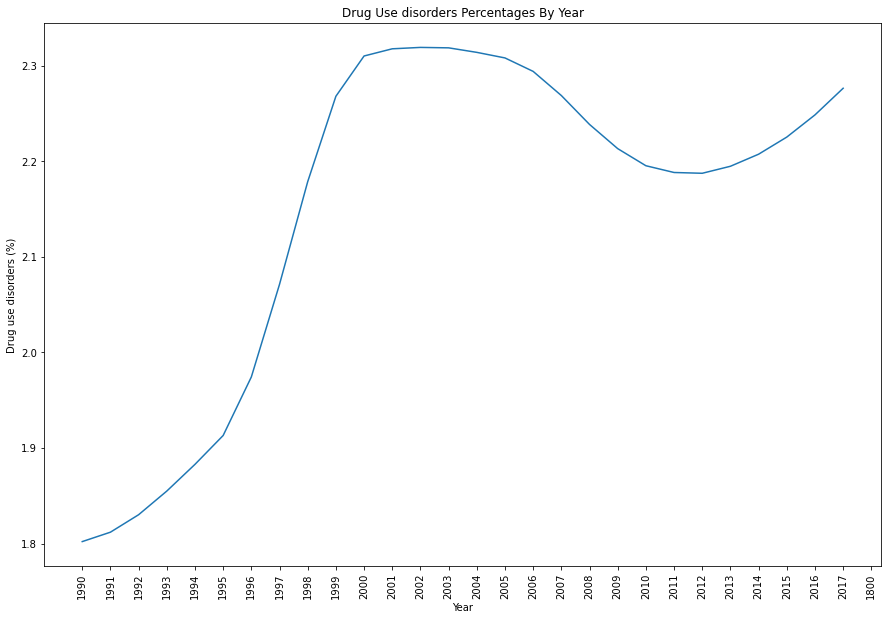

In [33]:
plt.figure(figsize=(15, 10))  # Set the figure size

sns.lineplot(data=canada_df_2, x="Year", y="Drug use disorders (%)")
plt.title('Drug Use disorders Percentages By Year')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

plt.show()

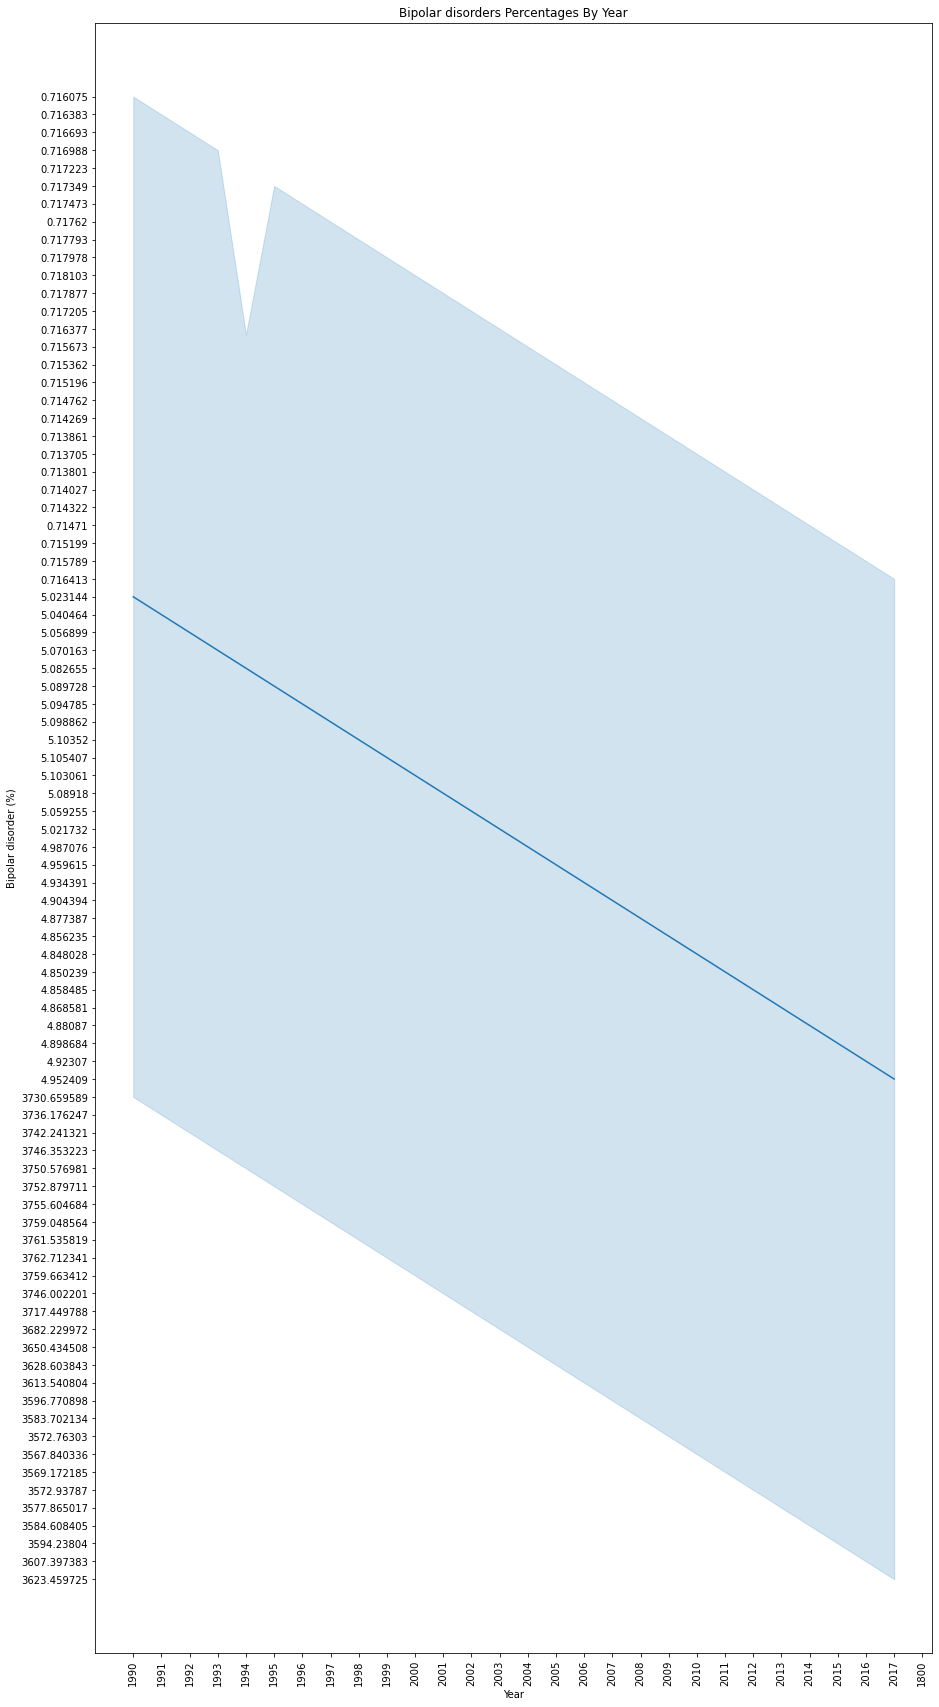

In [34]:
plt.figure(figsize=(15, 30))  # Set the figure size

sns.lineplot(data=canada_df_2, x="Year", y="Bipolar disorder (%)")
plt.title('Bipolar disorders Percentages By Year')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees

plt.show()

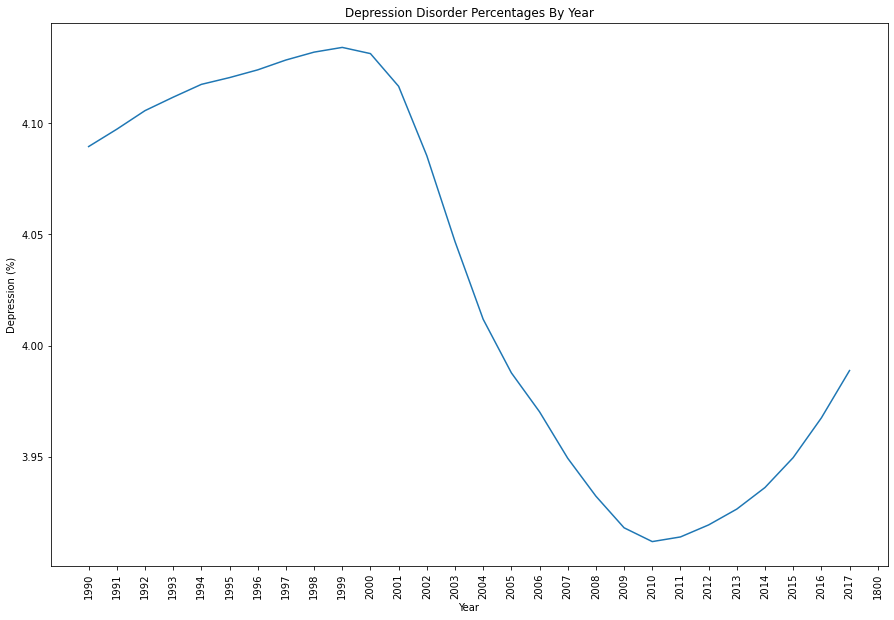

In [35]:
plt.figure(figsize=(15, 10))  # Set the figure size

sns.lineplot(data=canada_df_2, x="Year", y="Depression (%)")

plt.title('Depression Disorder Percentages By Year')
plt.xticks(rotation=90)  # Rotate the x-axis labels by 90 degrees
plt.show()

From these graphs, we see that bipolar disorder and schizophrenia has remained constant over the years. Depression and anxiety disorders have decreased over the years but it the graph is curving upwards in the recent years which means there might be a spike again upwards. However, drug use disorder and alcohol use disorder has increased over the years. 

In [36]:
import jovian

In [37]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis


'https://jovian.com/manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis'

# Conclusion

If you have made it down here, I want to thank you reading this! This is my first project in the world of data science, and through this, I have become so passionate about it and will keep exploring different data sets and libraries. 

Here are the questions I aim to answer in this dataset:

1. What are the top 10 countries with the highest percentage of Depressive Disorder?

2. Which mental health disorders exhibit a higher prevalence rate among males compared to females? Among females, which mental health disorders have a higher prevalence rate compared to males?

3. Are there any correlations or co-occurrence patterns between different mental health disorders based on the available data?

4. Are there any trends of the mental health disorders over a period of time. i.e increasing, decreasing, or remained constant over time?


Here are the results to these questions:

1. The country with the highest percentage of Depressive Disorder is Greenland

2. The mental health disorders that females exhibit a higher prevalance is anxiety and depression. For men, it is anxiety, depression, and bipolar disorder.

3. The strongest correlation between the mental health disorders is anxiety use disorder and drug use disorder

4. Bipolar disorder and schizophrenia has remained constant over the years. Depression and anxiety disorders have decreased over the years but it the graph is curving upwards. Drug use disorder and alcohol use disorder have increased over the years. 

Feel free to reach out if you have any questions or just want to say Hi!

LinkedIn: https://www.linkedin.com/in/manalafzal/

Email: manal.afzal479@gmail.com


In [38]:
import jovian

In [39]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis


'https://jovian.com/manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis'

# References 

Here are all the documentation that has helped me complete this datascience. Feel free to check it out. 

References:

https://www.nimh.nih.gov/

https://pandas.pydata.org/

https://matplotlib.org/

https://seaborn.pydata.org/

https://plotly.com/python/line-charts/


import jovian

In [40]:
jovian.commit()

<IPython.core.display.Javascript object>

[jovian] Updating notebook "manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis" on https://jovian.com
[jovian] Committed successfully! https://jovian.com/manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis


'https://jovian.com/manal-afzal/uncover-global-trends-in-mental-health-disorder-data-analysis'